<a href="https://colab.research.google.com/github/NigJohnIst/Core/blob/master/Boot_Camp_of_Car_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Prices

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
!pip install

In [ ]:
import requests

# UC Irvine Machine Learning Repository
# http://archive.ics.uci.edu/ml/datasets/Automobile

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [ ]:
header = [
    'symboling',
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-type',
    'num-of-cylinders',
    'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price',

]

In [ ]:
df = pd.read_csv(url, names=header, na_values='?')

In [ ]:
df.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,...,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,...,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,...,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,...,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,...,102.0,5500.0,24,30,13950.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df = df.applymap(
    lambda cell: np.nan if cell == '?' else cell
)

In [ ]:
# cols_with_missing = df.isna().sum()
cols_with_missing = df.isnull().sum()

In [ ]:
cols_with_missing[
    cols_with_missing > 0
]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [ ]:
df = df[~df['price'].isnull()]

In [ ]:
df.drop(labels=['normalized-losses'], axis=1, inplace=True)

<ipython-input-27-2437769fcdf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=['normalized-losses'], axis=1, inplace=True)


In [ ]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [ ]:
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 10)

In [ ]:
df.head(5)

,symboling,make,fuel-type,aspiration,num-of-doors,...,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,...,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,...,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,...,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,...,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,...,115.0,5500.0,18,22,17450.0


In [ ]:
features = {
    'categorical': [
        'make', 'fuel-type', 'aspiration', 'num-of-doors',
        'body-style', 'drive-wheels', 'engine-location',
        'engine-type', 'num-of-cylinders', 'fuel-system',

    ],
    'numerical': [
        'symboling', 'wheel-base', 'length', 'width', 'height',
        'curb-weight', 'engine-size', 'bore', 'stroke',
        'compression-ratio', 'horsepower', 'peak-rpm',
        'city-mpg', 'highway-mpg',
    ],
}

features['all'] = features['categorical'] + features['numerical']

target = 'price'

In [ ]:
df[target] = df[target].astype(np.float64) / 1000

<ipython-input-32-52188301eb63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target] = df[target].astype(np.float64) / 1000


In [ ]:
df[features['categorical']].sample(n=3, random_state=42)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
98,nissan,gas,std,two,hardtop,fwd,front,ohc,four,2bbl
16,bmw,gas,std,two,sedan,rwd,front,ohc,six,mpfi
31,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl


In [ ]:
df[features['numerical']].head(3)

,symboling,wheel-base,length,width,height,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,...,9.0,111.0,5000.0,21,27
1,3,88.6,168.8,64.1,48.8,...,9.0,111.0,5000.0,21,27
2,1,94.5,171.2,65.5,52.4,...,9.0,154.0,5000.0,19,26


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25, random_state=22)

In [ ]:
x_train = df_train[features['all']]
x_test  = df_test[features['all']]

y_train = df_train[target]
y_test  = df_test[target]

In [ ]:
y_train.describe()

count    150.000000
mean      13.724267
std        8.224519
min        5.118000
25%        7.961500
50%       11.072000
75%       16.678750
max       45.400000
Name: price, dtype: float64

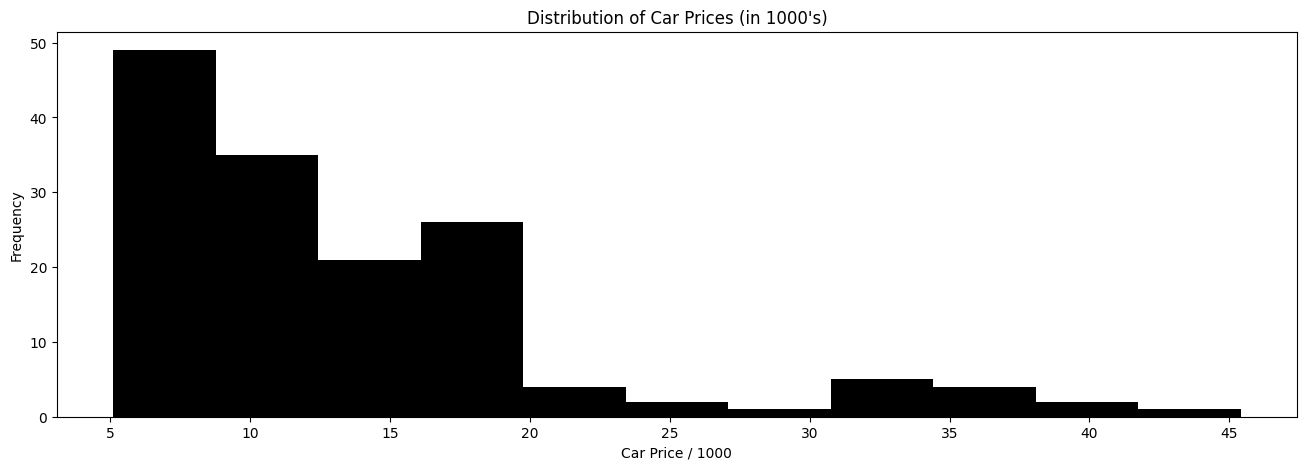

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

y_train.plot(
    title="Distribution of Car Prices (in 1000's)",
    kind='hist',
    bins=11,
    color='k',
    ax=ax
)

ax.set_xlabel('Car Price / 1000')

fig.show()

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

x_train = imp.fit_transform(x_train)
x_test = imp.transform(x_test)

x_train = pd.DataFrame(x_train, columns=features['all'])
x_test = pd.DataFrame(x_test, columns=features['all'])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnNamesKeeper(TransformerMixin, BaseEstimator):

    def __init__(self, transformer):
        self._columns = None
        self.transformer = transformer

    def __repr__(self):
        return repr(self.transformer)

    def fit(self, x, y=None):
        self._columns = x.columns
        self.transformer.fit(x)

    def transform(self, x, y=None):
        x = self.transformer.transform(x)
        return pd.DataFrame(x, columns=self._columns)

    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x)

In [ ]:
from sklearn.impute import SimpleImputer

imp = ColumnNamesKeeper(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent')
)

x_train = imp.fit_transform(x_train)
x_test = imp.transform(x_test)

In [ ]:
print(
    'Missing values in train: {}, and in test: {}'.format(
        x_train.isnull().sum().sum(),
        x_test.isnull().sum().sum(),
    )
)

Missing values in train: 0, and in test: 0


In [ ]:
x_train.head(4)

,make,fuel-type,aspiration,num-of-doors,body-style,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,volkswagen,diesel,std,four,sedan,...,23.0,52.0,4800.0,37,46
1,mercury,gas,turbo,two,hatchback,...,8.0,175.0,5000.0,19,24
2,nissan,gas,std,four,wagon,...,9.4,69.0,5200.0,31,37
3,toyota,gas,std,two,hatchback,...,9.3,161.0,5200.0,20,24


In [ ]:
from category_encoders.ordinal import OrdinalEncoder

enc = OrdinalEncoder(
    cols=features['categorical'],
    handle_unknown='value'
)

x_train = enc.fit_transform(x_train)
x_test = enc.transform(x_test)

ModuleNotFoundError: ignored

In [ ]:
x_train.head(4)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rgr = RandomForestRegressor(n_jobs=-1)

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

In [ ]:
print(rgr)

In [ ]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        np.sqrt(mean_squared_error(y_test, y_test_pred)),
        mean_absolute_error(y_test, y_test_pred),
    )
)

In [ ]:
df_pred = pd.DataFrame(
    {
        'actuals': y_test,
        'predictions': y_test_pred,
    }
)

df_pred['error'] = np.abs(y_test - y_test_pred)

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

df_pred.plot(
    title='Actuals vs Predictions',
    kind='scatter',
    x='actuals',
    y='predictions',
    color='k',
    ax=axs[0],
)

df_pred['error'].plot(
    title='Distribution of Error',
    kind='hist',
    color='k',
    ax=axs[1],
)

axs[1].set_xlabel('Absolute Error')

fig.show()

In [ ]:
pd.set_option('display.max_rows', 8)

In [ ]:
df_feature_importances = pd.DataFrame(
    {
        'Feature': x_train.columns,
        'Importance': rgr.feature_importances_,
    }
).sort_values(
    'Importance', ascending=False
)

df_feature_importances

In [ ]:
pd.set_option('display.max_rows', 50)

In [ ]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(1, 1, figsize=(15, 7), sharey=False)

top_features = df_feature_importances['Feature'].head(6)

plot_partial_dependence(
    rgr, x_train,
    features=top_features,
    n_cols=3,
    n_jobs=-1,
    line_kw={'color': 'k'},
    ax=ax
)

ax.set_title('Partial Dependence')

fig.show()

In [ ]:
# Shall I also write about permutation_importance.
# Tip: impurity-based feature importance can inflate the importance of numerical features.
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)


mae = []
mse = []

n_estimators_options = [5, 500, 5000]

for n_estimators in n_estimators_options:

    rgr = RandomForestRegressor(
        n_estimators=n_estimators,
        bootstrap=True,
        max_features=0.75,
        max_samples=0.75,
        n_jobs=-1,
    )

    rgr.fit(x_train, y_train)
    y_test_pred = rgr.predict(x_test)

    mae.append(mean_absolute_error(y_test, y_test_pred))
    mse.append(mean_squared_error(y_test, y_test_pred))

df_error = pd.DataFrame(
    {
        'n_estimators': n_estimators_options,
        'MAE': mae,
        'MSE': mse
    }
).set_index('n_estimators')

In [ ]:
df_error

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

df_error['MAE'].plot(
    title="Mean Absolute Error (Random Forest)",
    kind='bar',
    ylim=(1.1,1.7),
    color='k',
    ax=ax
)

ax.set_ylabel('MAE')

fig.show()

## Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Compare to when K > 1; performance is worse then
rgr = BaggingRegressor(
    base_estimator=KNeighborsRegressor(n_neighbors=1),
    n_estimators=200,
)

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

In [ ]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(df_test[target], y_test_pred),
        mean_squared_error(df_test[target], y_test_pred),
        mean_absolute_error(df_test[target], y_test_pred),
    )
)

In [ ]:
class ColumnNamesKeeper:

    def __init__(self, transformer):
        self._columns = None
        self.transformer = transformer

    def __repr__(self):
        return repr(self.transformer)

    def fit(self, x, y=None):
        self._columns = x.columns
        self.transformer.fit(x)

    def transform(self, x, y=None):
        x = self.transformer.transform(x)
        return pd.DataFrame(x, columns=self._columns)

    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x)

In [ ]:
from sklearn.impute import SimpleImputer
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

numerical_mputer = ColumnNamesKeeper(
    SimpleImputer(
        missing_values=np.nan,
        strategy='median'
    )
)

categorical_mputer = ColumnNamesKeeper(
    SimpleImputer(
        missing_values=np.nan,
        strategy='most_frequent'
    )
)

minmax_scaler = ColumnNamesKeeper(
    MinMaxScaler()
)

onehot_encoder = OneHotEncoder(
    cols=features['categorical'],
    handle_unknown='value'
)

numerical_pipeline = Pipeline(
    [
        ('numerical_mputer', numerical_mputer),
        ('minmax_scaler', minmax_scaler)
    ]
)

categorical_pipeline = Pipeline(
    [
        ('categorical_mputer', categorical_mputer),
        ('onehot_encoder', onehot_encoder)
    ]
)

x_train_knn = pd.concat(
    [
        numerical_pipeline.fit_transform(df_train[features['numerical']]),
        categorical_pipeline.fit_transform(df_train[features['categorical']]),
    ],
    axis=1
)

x_test_knn = pd.concat(
    [
        numerical_pipeline.transform(df_test[features['numerical']]),
        categorical_pipeline.transform(df_test[features['categorical']]),
    ],
    axis=1
)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

rgr = BaggingRegressor(
    base_estimator=KNeighborsRegressor(
        n_neighbors=1
    ),
    n_estimators=400,
)

rgr.fit(x_train_knn, y_train)
y_test_pred = rgr.predict(x_test_knn)

In [ ]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(df_test[target], y_test_pred),
        mean_squared_error(df_test[target], y_test_pred),
        mean_absolute_error(df_test[target], y_test_pred),
    )
)

In [ ]:
rgr = KNeighborsRegressor(
    n_neighbors=3
)

rgr.fit(x_train_knn, y_train)
y_test_pred = rgr.predict(x_test_knn)

In [ ]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(df_test[target], y_test_pred),
        mean_squared_error(df_test[target], y_test_pred),
        mean_absolute_error(df_test[target], y_test_pred),
    )
)

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=1000, max_depth=3, learning_rate=0.01, loss='ls')

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

In [ ]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        np.sqrt(mean_squared_error(y_test, y_test_pred)),
        mean_absolute_error(y_test, y_test_pred),
    )
)

In [ ]:
# Random Forest
# R2: 0.91, MSE: 4.16, RMSE: 2.04, MAE 1.31

In [ ]:
df_pred = pd.DataFrame(
    {
        'actuals': y_test,
        'predictions': y_test_pred,
    }
)

df_pred['error'] = np.abs(y_test - y_test_pred)

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

df_pred.plot(
    title='Actuals vs Predictions',
    kind='scatter',
    x='actuals',
    y='predictions',
    color='k',
    ax=axs[0],
)

df_pred['error'].plot(
    title='Distribution of Error',
    kind='hist',
    color='k',
    ax=axs[1],
)

fig.show()

In [ ]:
df_feature_importances = pd.DataFrame(
    {
        'Feature': x_train.columns,
        'Importance': rgr.feature_importances_,
    }
).sort_values(
    'Importance', ascending=False
)

df_feature_importances.head(8)

In [ ]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(1, 1, figsize=(15, 7), sharey=False)

top_features = df_feature_importances['Feature'].head(6)

plot_partial_dependence(
    rgr, x_train,
    features=top_features,
    n_cols=3,
    n_jobs=-1,
    line_kw={'color': 'k'},
    ax=ax
)

ax.set_title('Partial Dependence')

fig.show()

## Deviance

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.02, loss='ls')
rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

In [ ]:
def calculate_deviance(estimator, x_test, y_test):

    train_errors = estimator.train_score_
    test_errors = [
        estimator.loss_(y_test, y_pred_staged) # mean_squared_error(y_test, y_pred_staged)
        for y_pred_staged in estimator.staged_predict(x_test)
    ]

    return pd.DataFrame(
        {
            'n_estimators': range(1, estimator.estimators_.shape[0]+1),
            'train_error': train_errors,
            'test_error': test_errors,
        }
    ).set_index('n_estimators')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

df_deviance = calculate_deviance(rgr, x_test, y_test)

df_deviance['train_error'].plot(
    kind='line',
    color='k',
    linestyle=':',
    ax=ax
)

df_deviance['test_error'].plot(
    kind='line',
    color='k',
    linestyle='-',
    ax=ax
)

ax.set_title('Gradient Boosting - Deviance; comparing train and test errors vs n_estimators')

ax.legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

In [ ]:
learning_rates = [1, 0.1, 0.01]

fig, axs = plt.subplots(1, len(learning_rates), figsize=(16, 5), sharey=True)

for i, learning_rate in enumerate(learning_rates):

    rgr = GradientBoostingRegressor(n_estimators=500, learning_rate=learning_rate, loss='ls')
    rgr.fit(x_train, y_train)
    y_test_pred = rgr.predict(x_test)

    final_test_error = mean_squared_error(y_test, y_test_pred)

    df_deviance = calculate_deviance(rgr, x_test, y_test)

    df_deviance['train_error'].plot(
        title='Gradient Boosting - Deviance',
        kind='line',
        color='k',
        linestyle=':',
        ax=axs[i]
    )

    df_deviance['test_error'].plot(
        title=f'Gradient Boosting - Deviance\nlearning_rate={learning_rate}\nfinal_test_error={final_test_error:.2f}',
        kind='line',
        color='k',
        linestyle='-',
        ax=axs[i]
    )

    axs[i].set_ylabel('Loss')

    axs[i].legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

In [ ]:
subsamples = [1.0, 0.8, 0.6]

fig, axs = plt.subplots(1, len(subsamples), figsize=(16, 5), sharey=True)

for i, subsample in enumerate(subsamples):

    loss = 'lad'
    learning_rate = 0.01

    rgr = GradientBoostingRegressor(
        n_estimators=1000, subsample=subsample, learning_rate=learning_rate, loss=loss
    )
    rgr.fit(x_train, y_train)
    y_test_pred = rgr.predict(x_test)

    final_test_error = mean_squared_error(y_test, y_test_pred)

    df_deviance = calculate_deviance(rgr, x_test, y_test)

    df_deviance['train_error'].plot(
        title='Gradient Boosting - Deviance',
        kind='line',
        color='k',
        linestyle=':',
        ax=axs[i]
    )

    df_deviance['test_error'].plot(
        title=f'Gradient Boosting Deviance\n(Loss={loss.upper()} & LR={learning_rate})\nsubsample={subsample}\nfinal_test_error={final_test_error:.2f}',
        kind='line',
        color='k',
        linestyle='-',
        ax=axs[i]
    )

    axs[i].legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

## Early Stopping
n_iter_no_change, tol

## Dynamic Learning Rate

In [ ]:
def lr_changer(n, estimator, params):
    if n % 10:
        estimator.learning_rate = 0.01
    else:
        estimator.learning_rate = 0.1
    return False

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.01, loss='ls')
rgr.fit(x_train, y_train, monitor=lr_changer)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

df_deviance = calculate_deviance(rgr, x_test, y_test)

df_deviance['train_error'].plot(
    kind='line',
    color='k',
    linestyle=':',
    ax=ax
)

df_deviance['test_error'].plot(
    kind='line',
    color='k',
    linestyle='-',
    ax=ax
)

ax.set_title('Gradient Boosting - Deviance; comparing train and test errors vs n_estimators')

ax.legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

## Regression Ranges

In [ ]:
x_sample = np.arange(-10, 10, 0.05)
y_sample = np.random.normal(loc=0, scale=25, size=x_sample.shape[0])
y_sample *= x_sample

pd_random_samples = pd.DataFrame(
    {
        'x': x_sample,
        'y': y_sample
    }
)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharey=False)

pd_random_samples.plot(
    title='Regression Ranges', kind='scatter', x='x', y='y', color='k', alpha=0.95, ax=ax
)

fig.show()

In [ ]:
pd_random_samples.shape

In [ ]:
np.mean([10,20,22]), np.median([10,20,22])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharey=False)

pd_random_samples.plot(
    title='50th Quantile Regression', kind='scatter', x='x', y='y', color='k', alpha=0.95, ax=ax
)

for quantile in [0.5]:

    rgr = GradientBoostingRegressor(n_estimators=10, loss='quantile', alpha=quantile)
    rgr.fit(pd_random_samples[['x']], pd_random_samples['y'])
    pd_random_samples[f'pred_q{quantile}'] = rgr.predict(pd_random_samples[['x']])

    pd_random_samples.plot(
        kind='line', x='x', y=f'pred_q{quantile}', linestyle='-', alpha=0.75, color='k', ax=ax
    )

ax.legend(ncol=1, fontsize='x-large', shadow=True)

fig.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharey=False)

pd_random_samples.plot(
    title='Regression Ranges [10th & 90th Quantiles]', kind='scatter', x='x', y='y', color='k', alpha=0.95, ax=ax
)

for quantile in [0.1, 0.9]:

    rgr = GradientBoostingRegressor(n_estimators=10, loss='quantile', alpha=quantile)
    rgr.fit(pd_random_samples[['x']], pd_random_samples['y'])
    pd_random_samples[f'pred_q{quantile}'] = rgr.predict(pd_random_samples[['x']])

    pd_random_samples.plot(
        kind='line', x='x', y=f'pred_q{quantile}', linestyle='-', alpha=0.75, color='k', ax=ax
    )

ax.legend(ncol=1, fontsize='x-large', shadow=True)

fig.show()


In [ ]:
##

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

rgr_min = GradientBoostingRegressor(n_estimators=50, loss='quantile', alpha=0.25)
rgr_max = GradientBoostingRegressor(n_estimators=50, loss='quantile', alpha=0.75)

rgr_min.fit(x_train, y_train, monitor=lr_changer)
rgr_max.fit(x_train, y_train, monitor=lr_changer)

y_test_pred_min = rgr_min.predict(x_test)
y_test_pred_max = rgr_max.predict(x_test)

df_pred_range = pd.DataFrame(
    {
        'Actuals': y_test,
        'Pred_min': y_test_pred_min,
        'Pred_max': y_test_pred_max,
    }
)

In [ ]:
df_pred_range['Actuals in Range?'] = df_pred_range.apply(
    lambda row: 1 if row['Actuals'] >= row['Pred_min'] and row['Actuals'] <= row['Pred_max'] else 0,
    axis=1
)

In [ ]:
df_pred_range['Actuals in Range?'].mean()

In [ ]:
df_pred_range.sample(n=8)

In [ ]:
df_pred_range.head(5)

In [ ]:
(
    (
        df_pred_range['Pred_max'] - df_pred_range['Pred_min']
    ) / (
        df_pred_range['Pred_min']
    )
).head(5)

In [ ]:
# How big is the range ? [0.8 => 180% x min]

(
    (
        df_pred_range['Pred_max'] - df_pred_range['Pred_min']
    ) / (
        df_pred_range['Pred_min']
    )
).mean()

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
rgr = AdaBoostRegressor(n_estimators=100)

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=True)

pd.DataFrame(
    [
        (n, mean_squared_error(y_test, y_pred_staged))
        for n, y_pred_staged in enumerate(rgr.staged_predict(x_test), 1)
    ],
    columns=['n', 'Test Error']
).set_index('n').plot(
    title=f'Ada Boost: Test Error vs n_estimators',
    kind='line',
    color='k',
    linestyle='-',
    ax=ax
)

ax.set_xlabel('n_estimators')
ax.set_ylabel('Mean Squared Error (MSE)')

fig.show()


## Random Trees Embedding

In [ ]:
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

rgr = make_pipeline(RandomTreesEmbedding(), Ridge())
rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

In [ ]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred),
    )
)

In [ ]:
df_pred = pd.DataFrame(
    {
        'actuals': y_test,
        'predictions': y_test_pred,
    }
)

df_pred['error'] = np.abs(y_test - y_test_pred)

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

df_pred.plot(
    title='Actuals vs Predictions',
    kind='scatter',
    x='actuals',
    y='predictions',
    color='k',
    ax=axs[0],
)

df_pred['error'].plot(
    title='Distribution of Error',
    kind='hist',
    color='k',
    ax=axs[1],
)

fig.show()